<a href="https://colab.research.google.com/github/C4puto/Machine-Learning/blob/main/ViniciusCaputo_Classifica%C3%A7%C3%A3o_car_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificação Binára

## Importando bibliotecas

In [23]:
import pandas as pd
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from datetime import datetime
from sklearn.tree import export_graphviz
import graphviz

## Pré-processamento de dados

### Importando e visualizando os dados

In [24]:
url = 'https://raw.githubusercontent.com/C4puto/Machine-Learning/main/car-prices.csv'

dados = pd.read_csv(url, index_col=0)
dados.head()

,mileage_per_year,model_year,price,sold
0,21801,2000,30941.02,yes
1,7843,1998,40557.96,yes
2,7109,2006,89627.50,no
3,26823,2015,95276.14,no
4,7935,2014,117384.68,yes


### Convertendo valores de classe

In [25]:
troca = {
    'yes': 1,
    'no': 0,
}

dados['sold'] = dados['sold'].map(troca)

### Renomeando colunas


In [26]:
dados['mileage_per_year'] = dados['mileage_per_year'] * 1.60934

mapa = {
  'mileage_per_year': 'km_por_ano',
  'model_year': 'ano_modelo',
  'price': 'preco',
  'sold': 'vendido'
}

dados = dados.rename(columns=mapa)
dados.head()

,km_por_ano,ano_modelo,preco,vendido
0,35085.22134,2000,30941.02,1
1,12622.05362,1998,40557.96,1
2,11440.79806,2006,89627.50,0
3,43167.32682,2015,95276.14,0
4,12770.11290,2014,117384.68,1


### Criando novas colunas

In [27]:
ano_atual = datetime.today().year
dados['idade_do_modelo'] = ano_atual - dados['ano_modelo']
dados.head()

,km_por_ano,ano_modelo,preco,vendido,idade_do_modelo
0,35085.22134,2000,30941.02,1,24
1,12622.05362,1998,40557.96,1,26
2,11440.79806,2006,89627.50,0,18
3,43167.32682,2015,95276.14,0,9
4,12770.11290,2014,117384.68,1,10


### Exclusão de colunas

In [28]:
dados = dados.drop(columns= ['ano_modelo'], axis=1)
dados.head()

,km_por_ano,preco,vendido,idade_do_modelo
0,35085.22134,30941.02,1,24
1,12622.05362,40557.96,1,26
2,11440.79806,89627.50,0,18
3,43167.32682,95276.14,0,9
4,12770.11290,117384.68,1,10


### Avaliando balanceamento dos dados

In [29]:
dados.vendido.value_counts()

vendido
1    5800
0    4200
Name: count, dtype: int64

## Separando dados de treino e teste

In [30]:
X = dados[['km_por_ano', 'idade_do_modelo', 'preco']]
y = dados['vendido']

seed = 42
train_x, test_x, train_y, test_y = train_test_split(X, y, random_state=seed, stratify=y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(train_x), len(test_x)))

Treinaremos com 7500 elementos e testaremos com 2500 elementos


## Modelo classificador LinearSVC

In [31]:
model = LinearSVC(random_state=seed)
model.fit(train_x, train_y)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(random_state=42)

In [32]:
result = model.predict(test_x)

accuracy = accuracy_score(test_y, result) * 100 # Compara vetores
print(f'{accuracy:.2f}%')

58.00%


### Modelo dummy

In [33]:
dummy = DummyClassifier()  # Cria modelo
dummy.fit(train_x, train_y)  # Treina modelo
result2 = dummy.score(test_x, test_y)  # Testa modelo
print("A acurácia do dummy foi %.2f%%" % (result2 * 100))

A acurácia do dummy foi 58.00%


## Modelo classificador SVC com StandartScaler

In [34]:
scaler = StandardScaler()
scaler.fit(train_x)
train_x_normalized = scaler.transform(train_x)
test_x_normalized = scaler.transform(test_x)

In [35]:
model_2 = SVC(gamma='auto')
model_2.fit(train_x_normalized, train_y)

SVC(gamma='auto')

In [36]:
result_2 = model_2.predict(test_x_normalized)
accuracy_2 = model_2.score(test_x_normalized, test_y)
print("Acuracia: %.2f%%" % (accuracy_2 * 100))

Acuracia: 76.04%


## Decision Tree

In [37]:
# Não precisa normalizar os dados
model_3 = DecisionTreeClassifier(max_depth=3, random_state=seed)
model_3.fit(train_x, train_y)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [38]:
result_3 = model_3.predict(test_x)
accuracy_3 = model_3.score(test_x, test_y)
print("Acuracia: %.2f%%" % (accuracy_3 * 100))

Acuracia: 78.04%


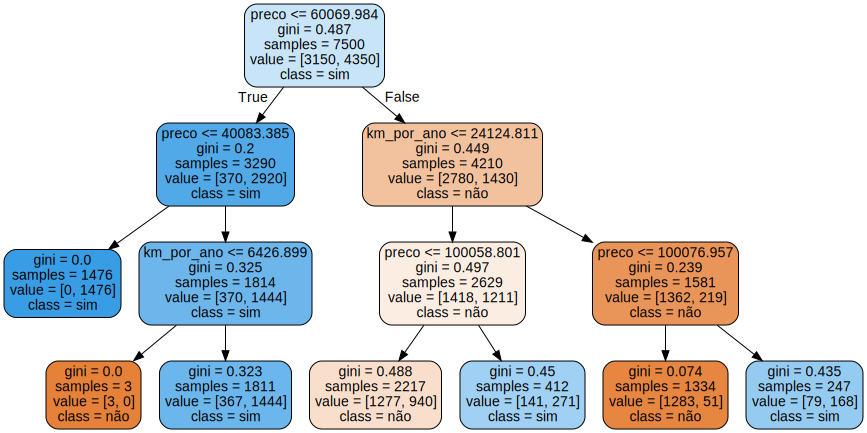

In [39]:
features = X.columns
dot_data = export_graphviz(model_3, out_file=None, filled=True, rounded=True, feature_names=features, class_names=["não", "sim"])
graph = graphviz.Source(dot_data)
graph

## Exemplos de aplicação

In [40]:
exemplos = [[8000, 2010, 55000], [20000, 2000, 25000], [300, 2024, 120000]]
results = model.predict(exemplos)

print(results)

[1 1 1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


In [41]:
exemplos_normalized = scaler.transform(exemplos)
results_2 = model_2.predict(exemplos)

print(results_2)

[1 1 1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [42]:
results_3 = model_3.predict(exemplos)

print(results_3)

[1 1 1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
